reference:
1. https://www.kaggle.com/junkal/selecting-the-best-regression-model
2. https://www.kaggle.com/harlfoxem/housesalesprediction
3. https://www.kaggle.com/danielmarrama/diamond-exploratory-analysis-and-visualizations
4. https://rpubs.com/Mai_Thanh_Nguyen/426480
5. https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/
6. https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/


set up the question
check if santisfy the requirement of text
decide the text
null hypothesis
histogram
qq plot
relationship?
conclusion?

Basic requirement
Explanation of data and its source
Question(s) to be researched
A distribution analysis
A  hypothesis test
Statistical analysis and justification
Conclusions


In [2]:
import pandas as pd
from scipy.stats import chi2_contingency,iqr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

The dataset is about U.S. Personal Medical Cost. Leveraging customer information is paramount for most company. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have. 

Ihe dataset is coming from websites Kaggle: https://www.kaggle.com/mirichoi0218/insurance

The attributes information:
1. age : age of primary beneficiary 
2. sex : insurance contractor gender, including female and male 
3. bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 
4. children : Number of children covered by health insurance / Number of dependents 
5. smoker : Smoking people
6. region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. 
7. charges : Individual medical costs billed by health insurance. 

In [54]:
# read the dataset 
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# identify the datatype of each column
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# find the numbers of null for each column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

because there is no null in each column, we do not need to use 'df.fillna("unknown",inplace=True)' function to fill out the empty rows.

In [6]:
# get the basic statistic summary of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


According to the basic statistic summary, we can know there are 1338 rows in the dataset.

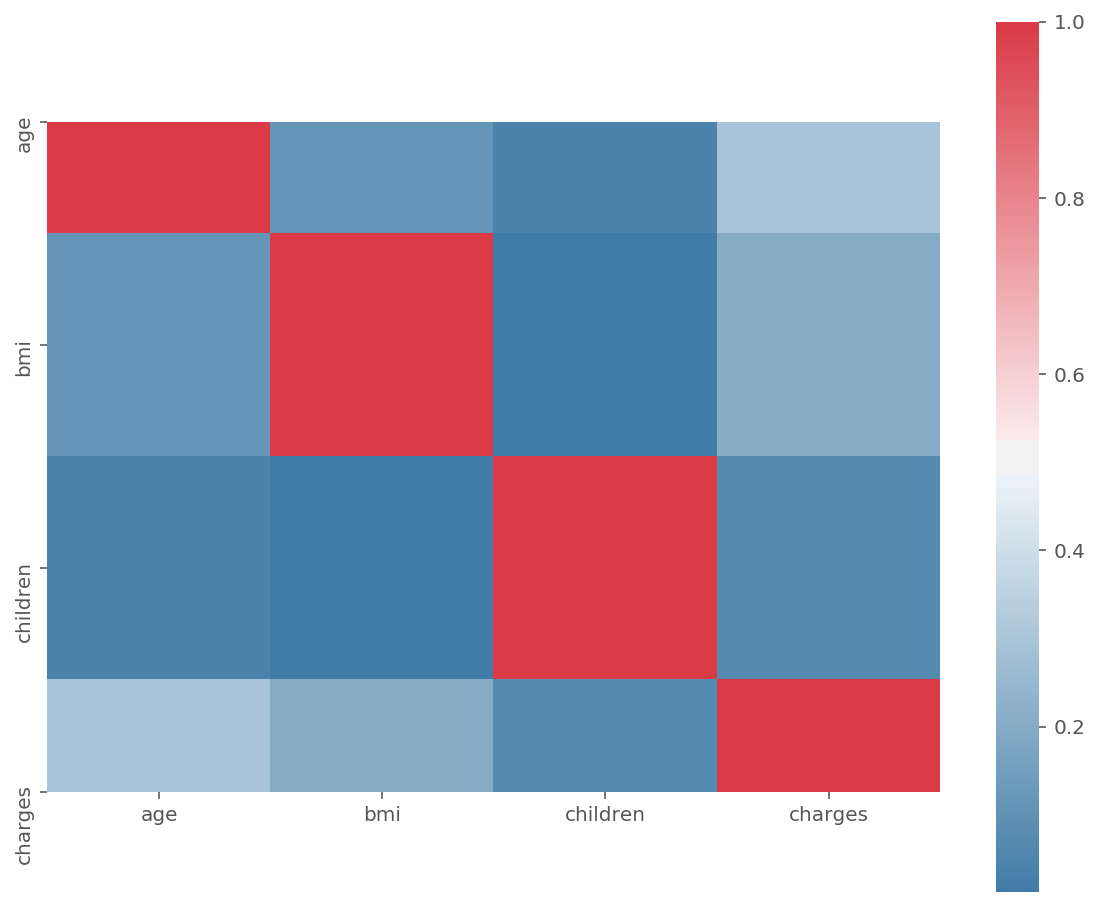

In [17]:
# correlation of the data
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

# What is the age，bmi, charges'  distribution in this dataset?

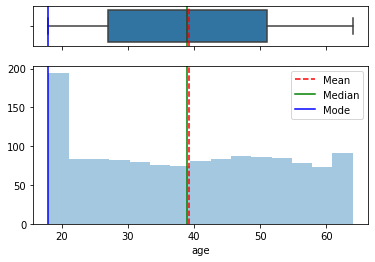

In [7]:
# the distribution of age
# get the central tendency of the age column
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=df.age.mean()
median=df.age.median()
mode=df.age.mode()[0]

# create the box plot for the age column
sns.boxplot(df.age, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

# create the histogram of age column
sns.distplot(df.age, ax=ax_hist,bins=15,norm_hist=False,kde=False)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')
# create the label of the mean, median, mode lines
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

# print the results
ax_box.set(xlabel='')
plt.show()
f.savefig("age_dist.jpg")

According to the chart, we can know the mean of age is larger than median.

Text(0.5, 1.0, 'Distribution of age')

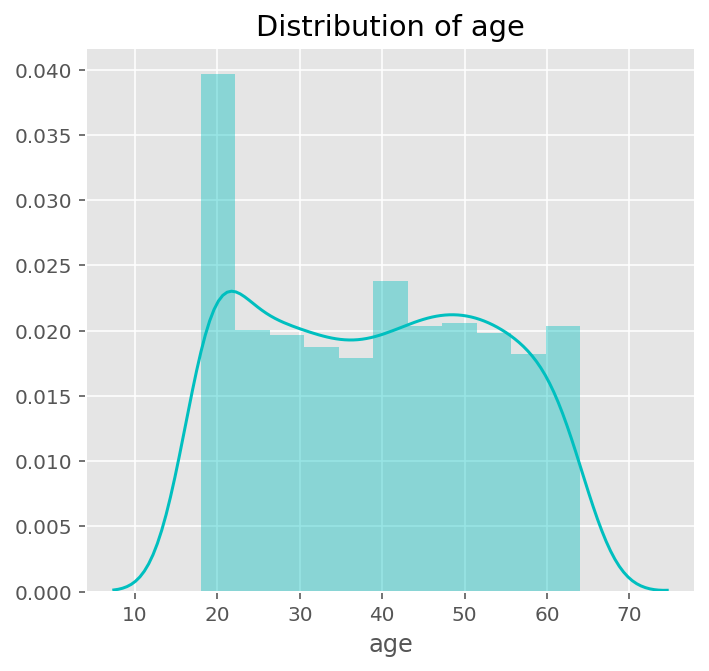

In [25]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df["age"],color='c',ax=ax)
ax.set_title('Distribution of age')

According to the charts, the age distribution does not fit the normal distribution well and it is right-skewed because the mean of age is larger than media.

In [9]:
print("Mean:",str(mean))
print("Median:",str(median))
print("Mode:",str(mode))
print("IQR:",str(iqr(df.age)))
print("SD:",str(df.age.std()))

Mean: 39.20702541106129
Median: 39.0
Mode: 18
IQR: 24.0
SD: 14.049960379216172


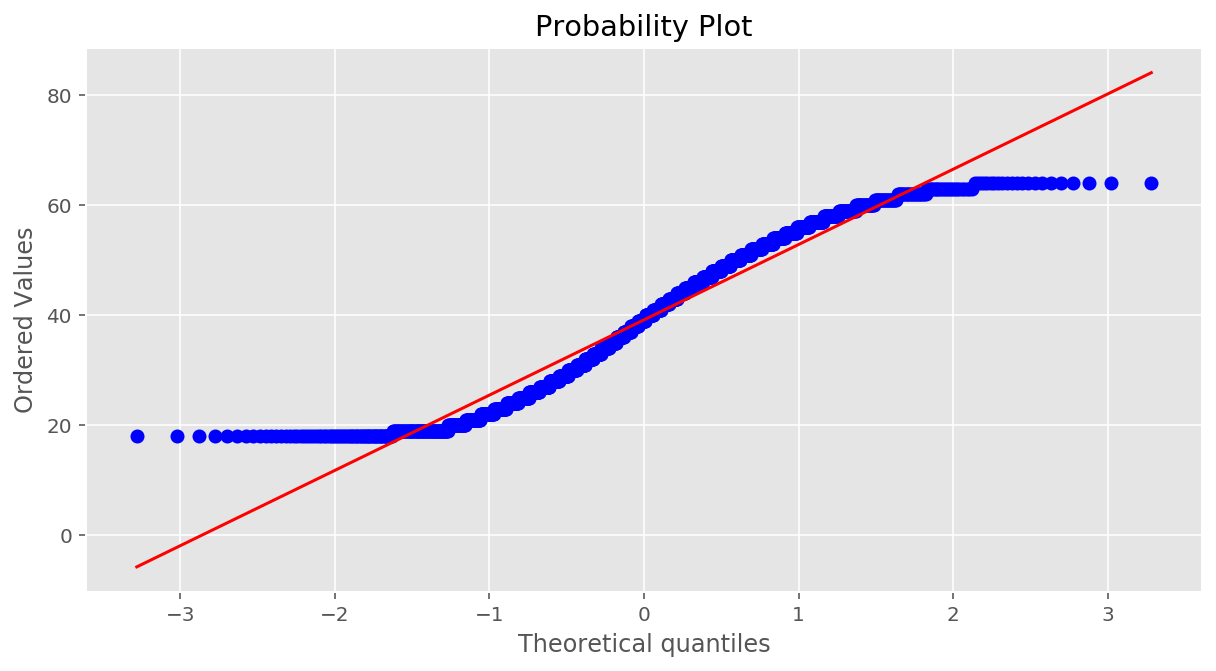

In [10]:
# Evaluating the normal distribution by a normal probability plot, also called a normal Q-Q plot for "quantile-quantile".
from scipy.stats import probplot
probplot(df['age'], plot = plt)
plt.show();

#####  the distribution of bmi

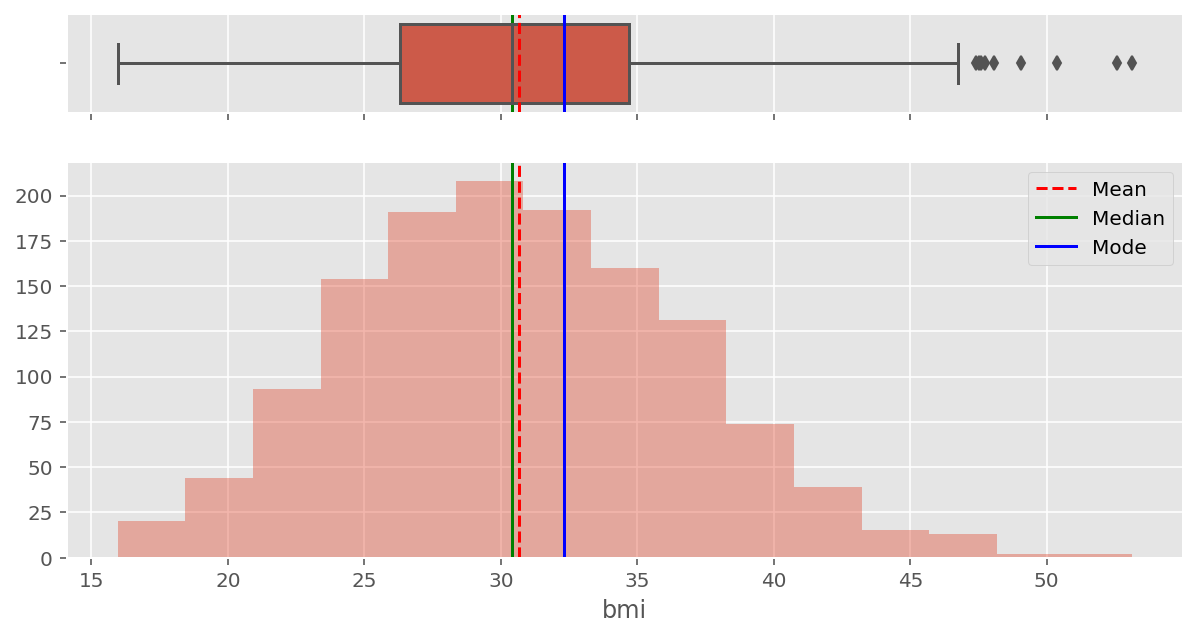

In [11]:

# get the central tendency of the age column
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=df.bmi.mean()
median=df.bmi.median()
mode=df.bmi.mode()[0]

# create the box plot for the age column
sns.boxplot(df.bmi, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

# create the histogram of age column
sns.distplot(df.bmi, ax=ax_hist,bins=15,norm_hist=False,kde=False)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')
# create the label of the mean, median, mode lines
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

# print the results
ax_box.set(xlabel='')
plt.show()
f.savefig("age_dist.jpg")

According to the chart, we can know the mean of age is larger than median.

Text(0.5, 1.0, 'Distribution of bmi')

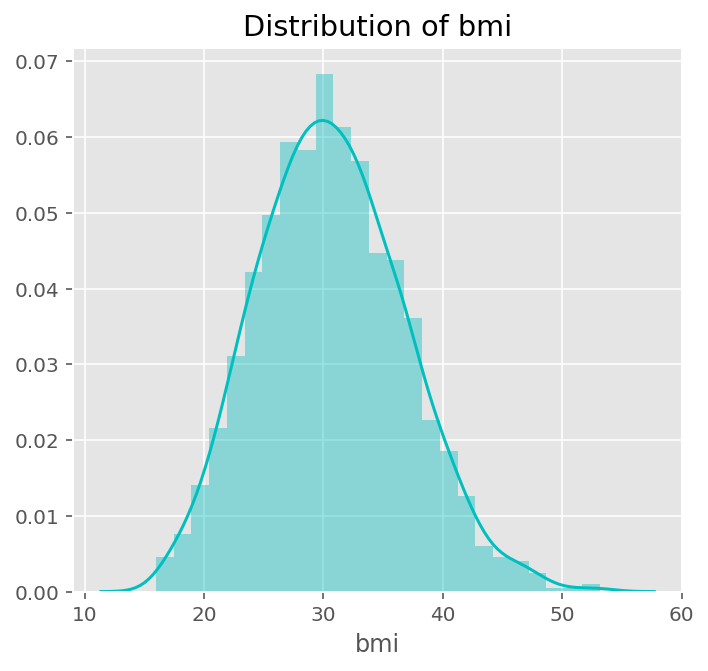

In [24]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df["bmi"],color='c',ax=ax)
ax.set_title('Distribution of bmi')

In [12]:
print("Mean:",str(mean))
print("Median:",str(median))
print("Mode:",str(mode))
print("IQR:",str(iqr(df.age)))
print("SD:",str(df.bmi.std()))

Mean: 30.663396860986538
Median: 30.4
Mode: 32.3
IQR: 24.0
SD: 6.098186911679017


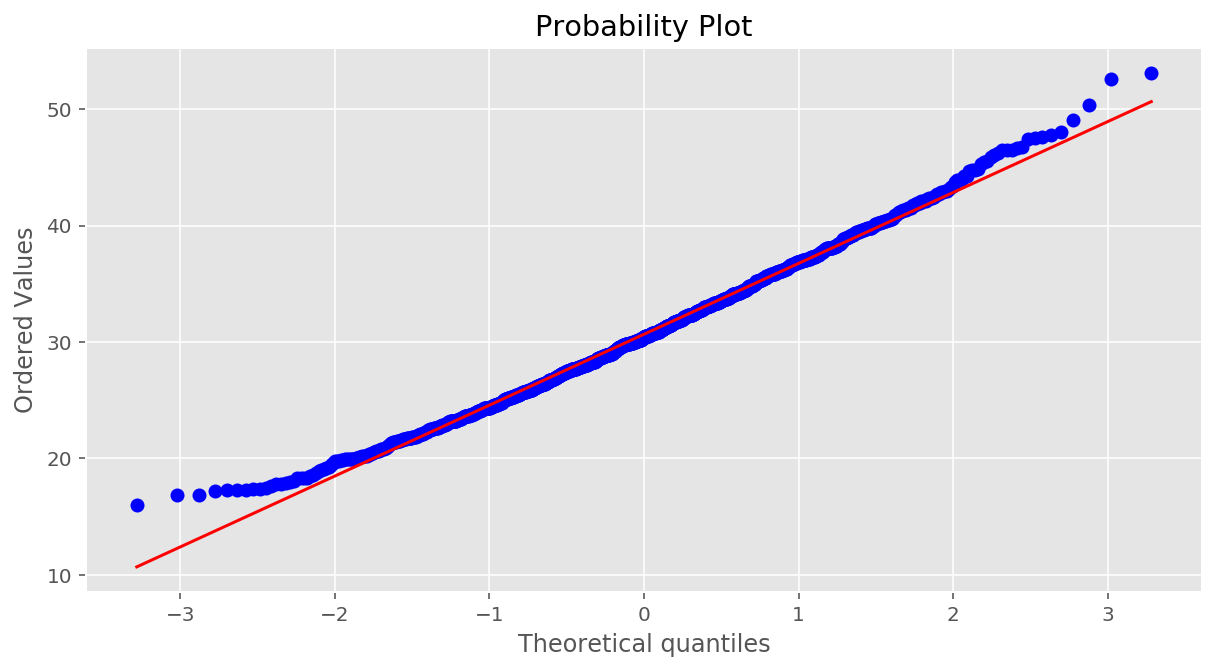

In [14]:
# Evaluating the normal distribution by a normal probability plot, also called a normal Q-Q plot for "quantile-quantile".
from scipy.stats import probplot
probplot(df['bmi'], plot = plt)
plt.show();

According to the charts, the age distribution fit the normal distribution and it is right-skewed because the mean of age is larger than media.

#####  the distribution of charges

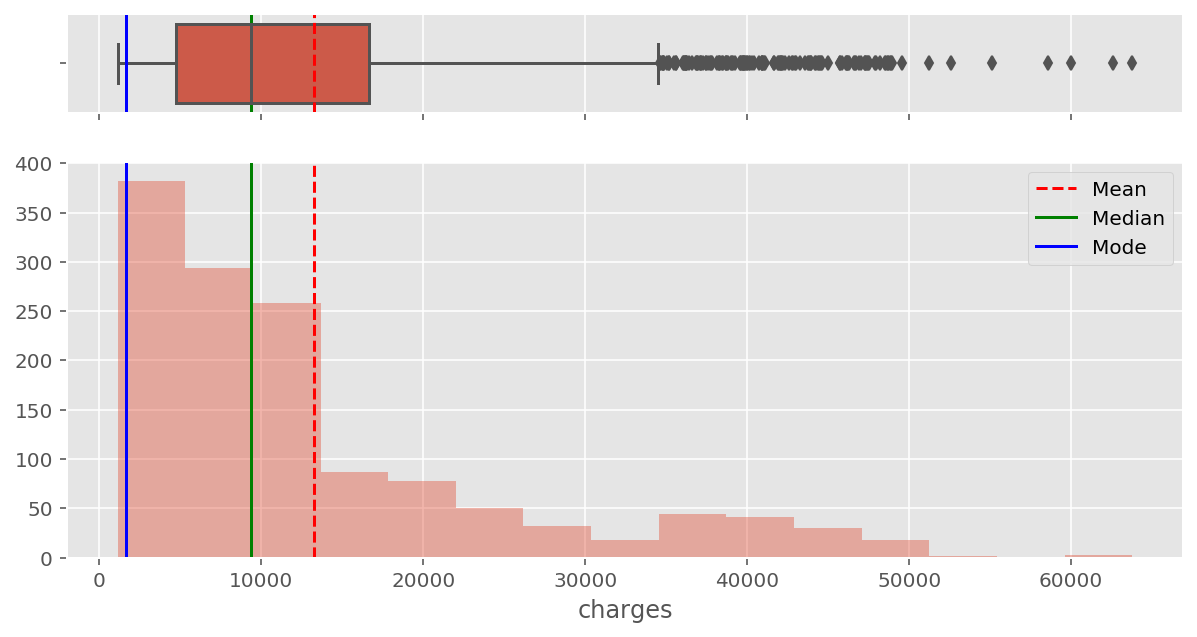

In [102]:

# get the central tendency of the age column
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=df.charges.mean()
median=df.charges.median()
mode=df.charges.mode()[0]

# create the box plot for the age column
sns.boxplot(df.charges, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

# create the histogram of age column
sns.distplot(df.charges, ax=ax_hist,bins=15,norm_hist=False,kde=False)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')
# create the label of the mean, median, mode lines
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

# print the results
ax_box.set(xlabel='')
plt.show()
f.savefig("age_dist.jpg")

According to the chart, we can know the mean of age is larger than median.

In [140]:
print("Mean:",str(mean))
print("Median:",str(median))
print("Mode:",str(mode))
print("IQR:",str(iqr(df.age)))
print("SD:",str(df.charges.std()))

Mean: 13270.422265141257
Median: 9382.033
Mode: 1639.5631
IQR: 24.0
SD: 12110.011236693994


Text(0.5, 1.0, 'Distribution of charges')

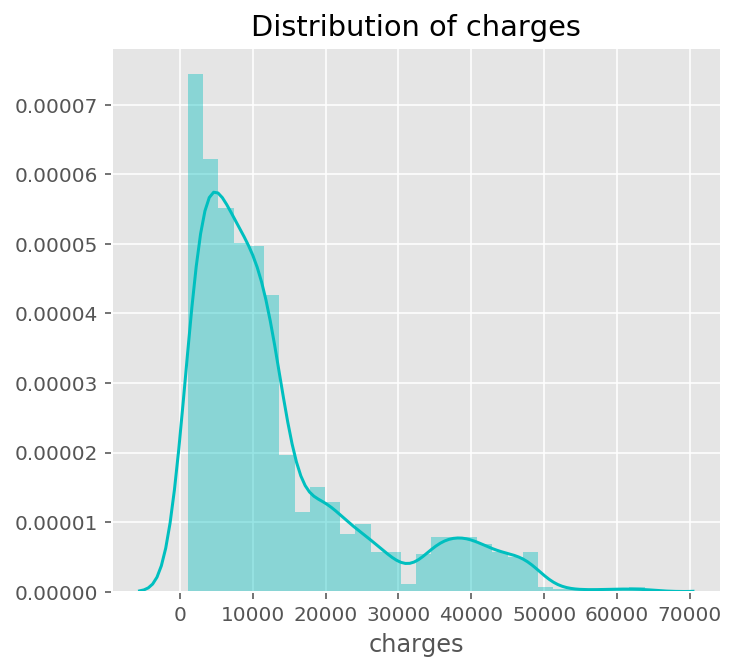

In [26]:
# the distribution of charges
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges')

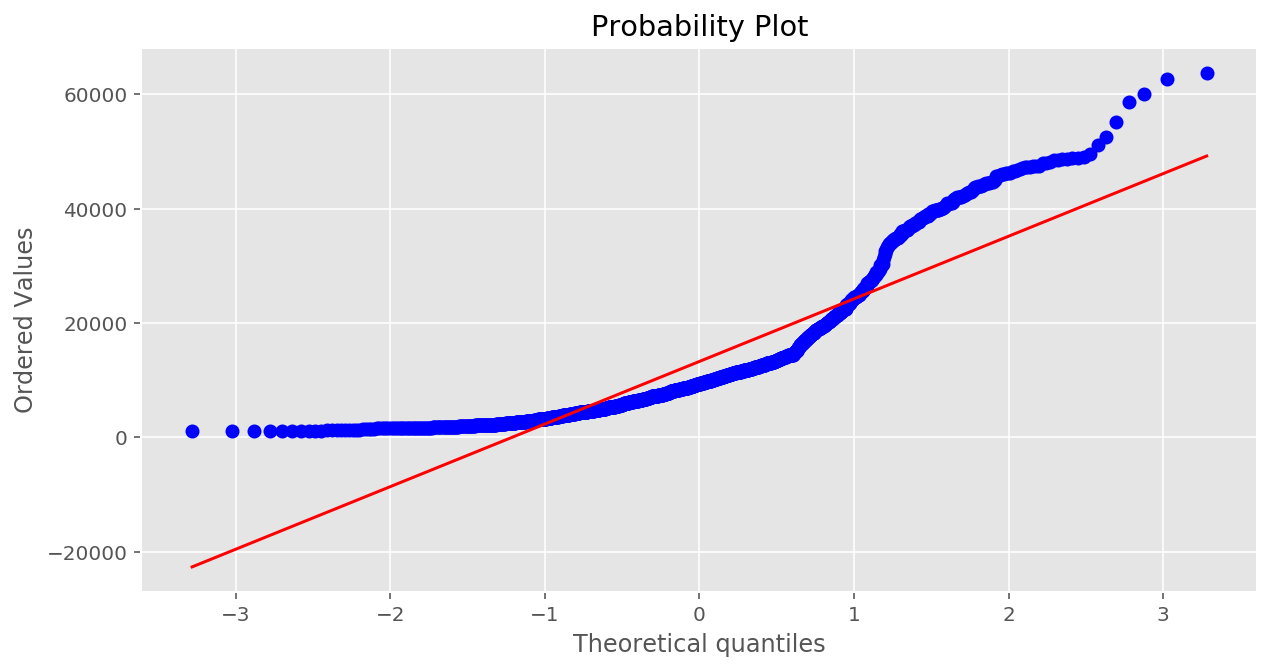

In [142]:
# Evaluating the normal distribution by a normal probability plot, also called a normal Q-Q plot for "quantile-quantile".
from scipy.stats import probplot
probplot(df['charges'], plot = plt)
plt.show();

According to the charts, the charge distribution does not fit the normal distribution well and it is strongly right-skewed because the mean of age is larger than media.

# Are there systematic differences in the beneficiary's residential area in the US between people with different smoker statuses?

we have 2 groups to measure the difference and only have nominal variables, therefore, we use the Chi-square test.

Hypotheses: 
1.  Ho: There are no differences in the beneficiary's residential area in the US between people with different smoke statuses.
2.  H1: There are differences in the beneficiary's residential area in the US between people with different smoke statuses.

There are two conditions that must be checked before performing a chi-square test:
Independence. Each case that contributes a count to the table must be independent of all the other cases in the table. we fit.
Sample size / distribution. Each particular scenario (i.e. cell count) must have at least 5 expected cases.we fit.


In [143]:
region_status_contingency_table = df.groupby(["region","smoker"]).size().unstack(level=-1)

In [144]:
region_status_contingency_table.sort_values("yes",inplace=True)
region_status_contingency_table

smoker,no,yes
region,,
northwest,267,58
southwest,267,58
northeast,257,67
southeast,273,91


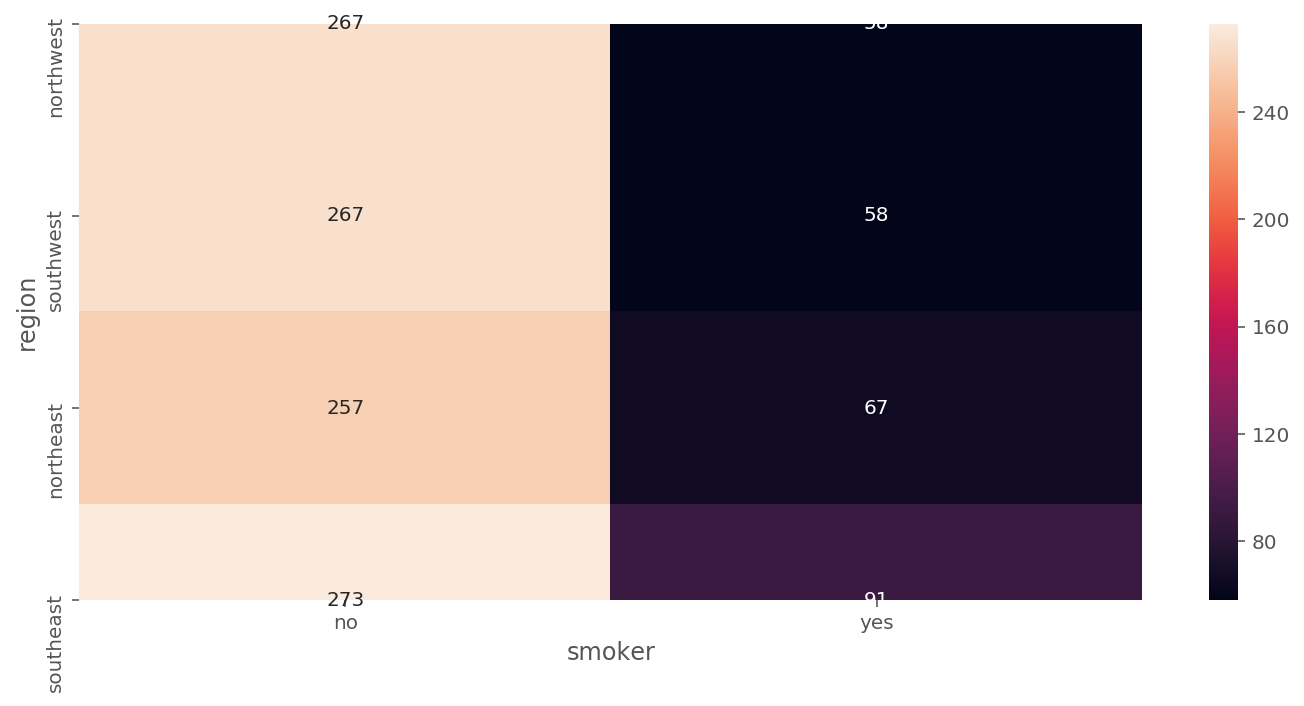

In [145]:
ax = sns.heatmap(region_status_contingency_table, annot=True, fmt="d")
plt.tight_layout()
plt.savefig("heatmap.png")

In [146]:
chi2_stat, p_val, dof, ex = chi2_contingency(region_status_contingency_table)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
7.343477761407071


===Degrees of Freedom===
3


===P-Value===
0.06171954839170541


===Contingency Table===
[[258.44544096  66.55455904]
 [258.44544096  66.55455904]
 [257.65022422  66.34977578]
 [289.45889387  74.54110613]]


X^2 (3) = 7.343477761407071, p = 0.06171954839170541.
There are no strong evidence prove that there are systematic differences in the beneficiary's residential area in the US between people with different smoke statuses

# Are there systematic differences in the medical personal cost with a different smoking status?

we use An Independent Samples t-test compares the means for two groups.

In [29]:
df2 = df
smoker = {'yes': 1,'no': 0} 
df2.smoker = [smoker[item] for item in df2.smoker] 
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

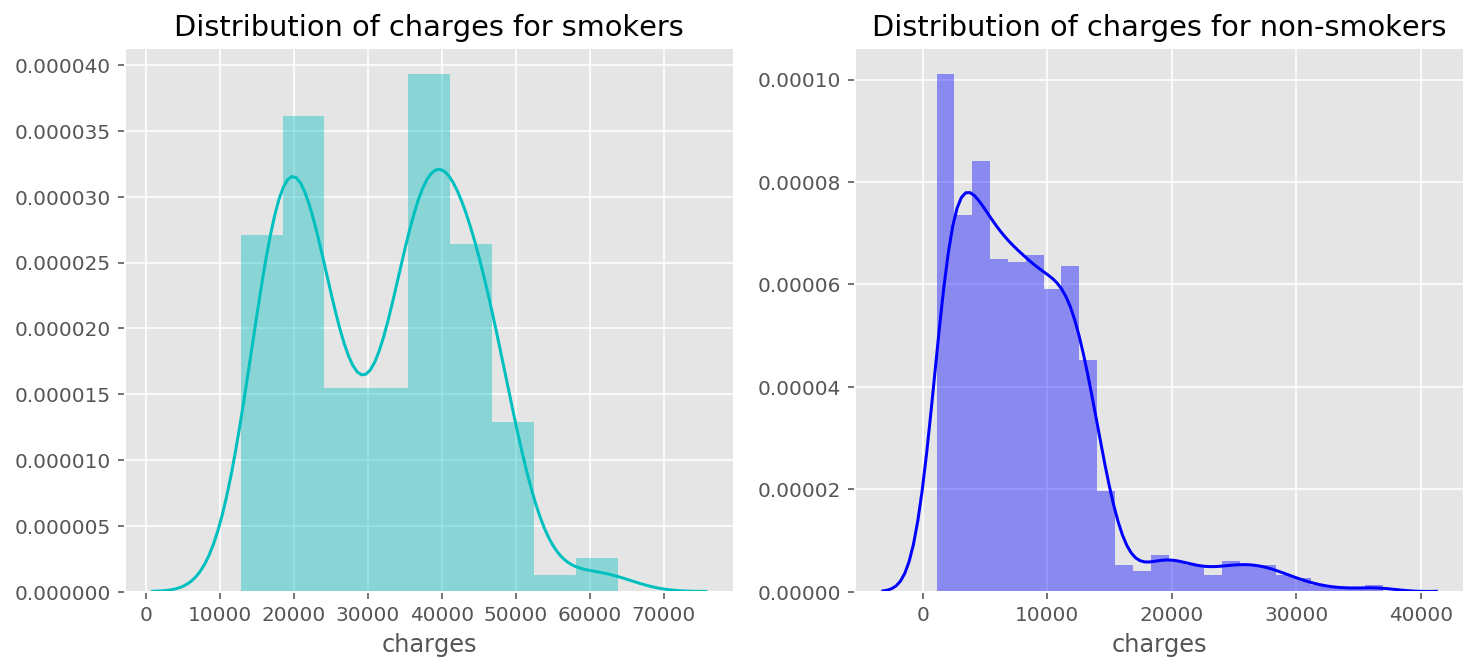

In [32]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df2[(df2.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df2[(df2.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

According to the charts, we find that the Smoking patients spend more money on treatment.

In [47]:
data1 = df.loc[df['smoker'] == 'yes', 'charges']
data1

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [48]:
data2 = df.loc[df['smoker'] == 'no', 'charges']
data2

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [49]:
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

alpha = 0.05
# calculate means
mean1, mean2 = mean(data1), mean(data2)
# calculate standard errors
se1, se2 = sem(data1), sem(data2)
# standard error on the difference between the samples
sed = sqrt(se1**2.0 + se2**2.0)
# calculate the t statistic
t_stat = (mean1 - mean2) / sed
# degrees of freedom
df = len(data1) + len(data2) - 2
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print(t_stat, df, cv, p) 

32.75188776634185 1336 1.6459949688112576 0.0


According to the p value of T test is smaller than 0.05, it indicates that there is enough variance in the sample to account for possible mean differences. It means that we need to reject the Ho. There are systematic differences in the midical personal cost with different smoking status. The Smoking patients spend more money on treatment.

# Are there systematic differences in the medical personal cost with a different gender?

we use An Independent Samples t-test compares the means for two groups.

1. Ho: there are no systematic differences in the midical personal cost with different gender
2. H1: there are systematic differences in the midical personal cost with different gender

In [34]:
df2 = df
sex = {'female': 1,'male': 0} 
df2.sex = [sex[item] for item in df2.sex] 
df2

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


Text(0.5, 1.0, 'Distribution of charges for male')

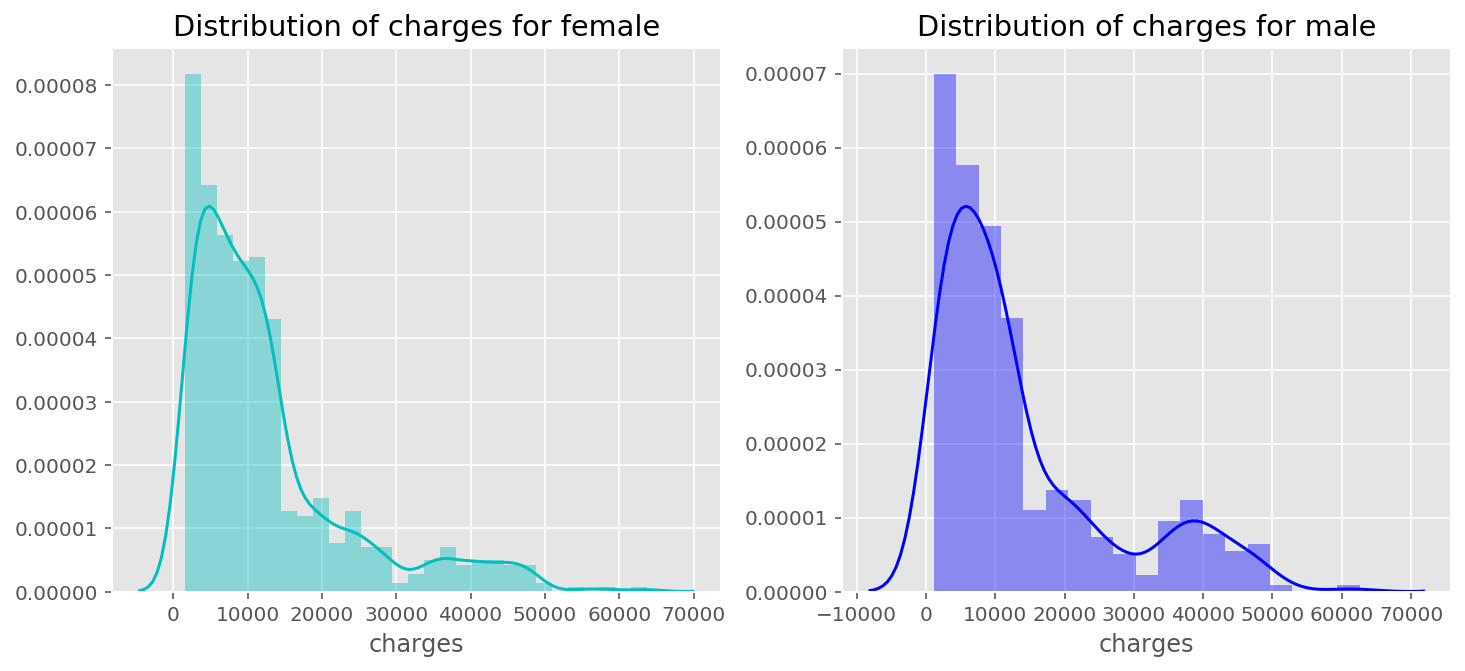

In [40]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df2[(df2.sex == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for female')

ax=f.add_subplot(122)
sns.distplot(df2[(df2.sex == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for male')

In [55]:
data1 = df.loc[df['sex'] == 'female', 'charges']
data1

0       16884.92400
5        3756.62160
6        8240.58960
7        7281.50560
9       28923.13692
           ...     
1332    11411.68500
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 662, dtype: float64

In [57]:
data1.describe()

count      662.000000
mean     12569.578844
std      11128.703801
min       1607.510100
25%       4885.158700
50%       9412.962500
75%      14454.691825
max      63770.428010
Name: charges, dtype: float64

In [63]:
data1.median()

9412.9625

In [58]:
data2 = df.loc[df['sex'] == 'male', 'charges']
data2

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
8        6406.41070
           ...     
1324     4239.89265
1325    13143.33665
1327     9377.90470
1329    10325.20600
1333    10600.54830
Name: charges, Length: 676, dtype: float64

In [60]:
data2.describe()

count      676.000000
mean     13956.751178
std      12971.025915
min       1121.873900
25%       4619.134000
50%       9369.615750
75%      18989.590250
max      62592.873090
Name: charges, dtype: float64

In [64]:
data2.median()

9369.61575

According to the data and chaarts, we can know the female average charges is less than male butthe median is the charges of male less than female. 

In [187]:
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

alpha = 0.05
# calculate means
mean1, mean2 = mean(data1), mean(data2)
# calculate standard errors
se1, se2 = sem(data1), sem(data2)
# standard error on the difference between the samples
sed = sqrt(se1**2.0 + se2**2.0)
# calculate the t statistic
t_stat = (mean1 - mean2) / sed
# degrees of freedom
df = len(data1) + len(data2) - 2
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print(t_stat, df, cv, p) 

-2.1008878232359565 1336 1.6459949688112576 0.03583779006343746


According to the p value of T test is smaller than 0.05, it indicates that there is enough variance in the sample to account for possible mean differences. It means that we need to reject the Ho. There are systematic differences in the midical personal cost with different gender.

#### The exploration of smoker status, gender, and charges.

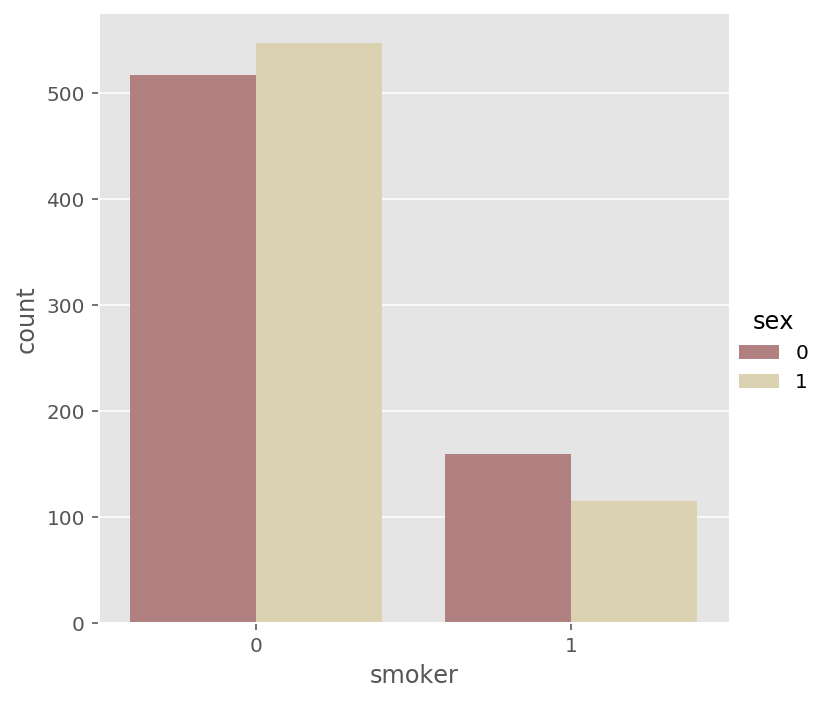

In [36]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df2 )

According to the chart, we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. 

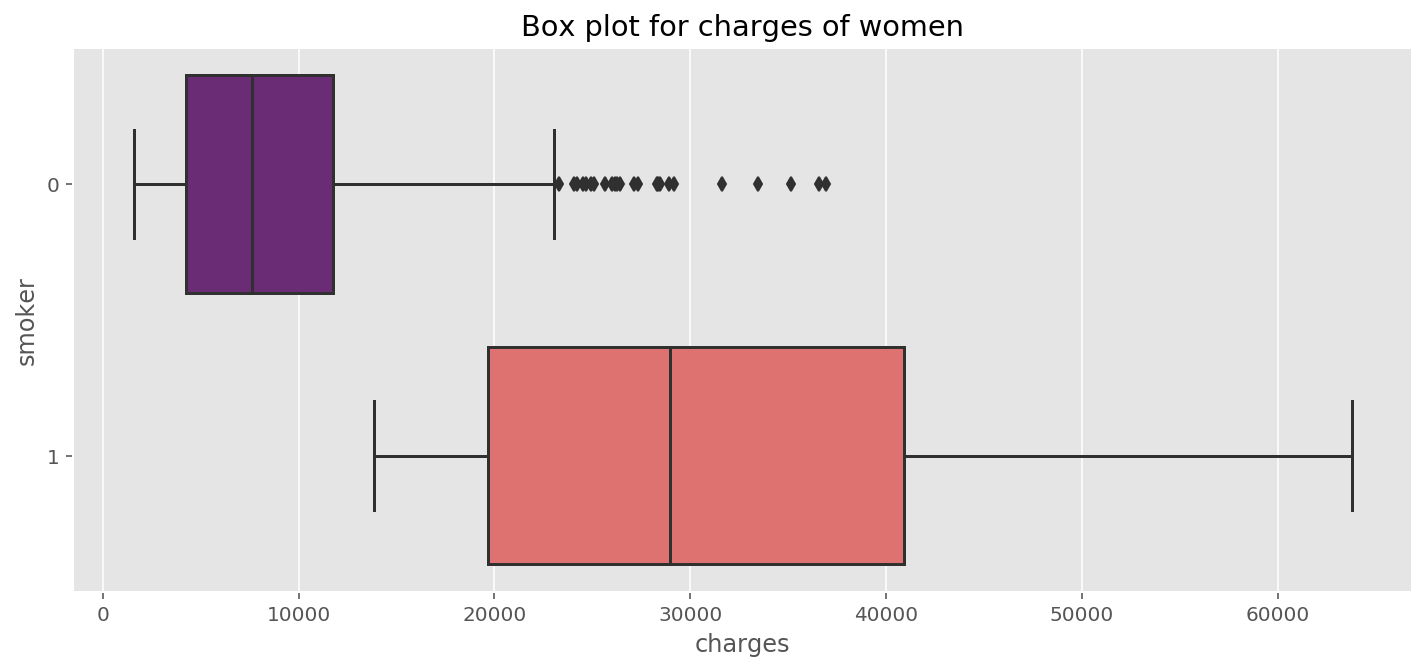

In [37]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df2[(df2.sex == 1)] , orient="h", palette = 'magma')

The female non-smoker will spend less charges than female smoker.

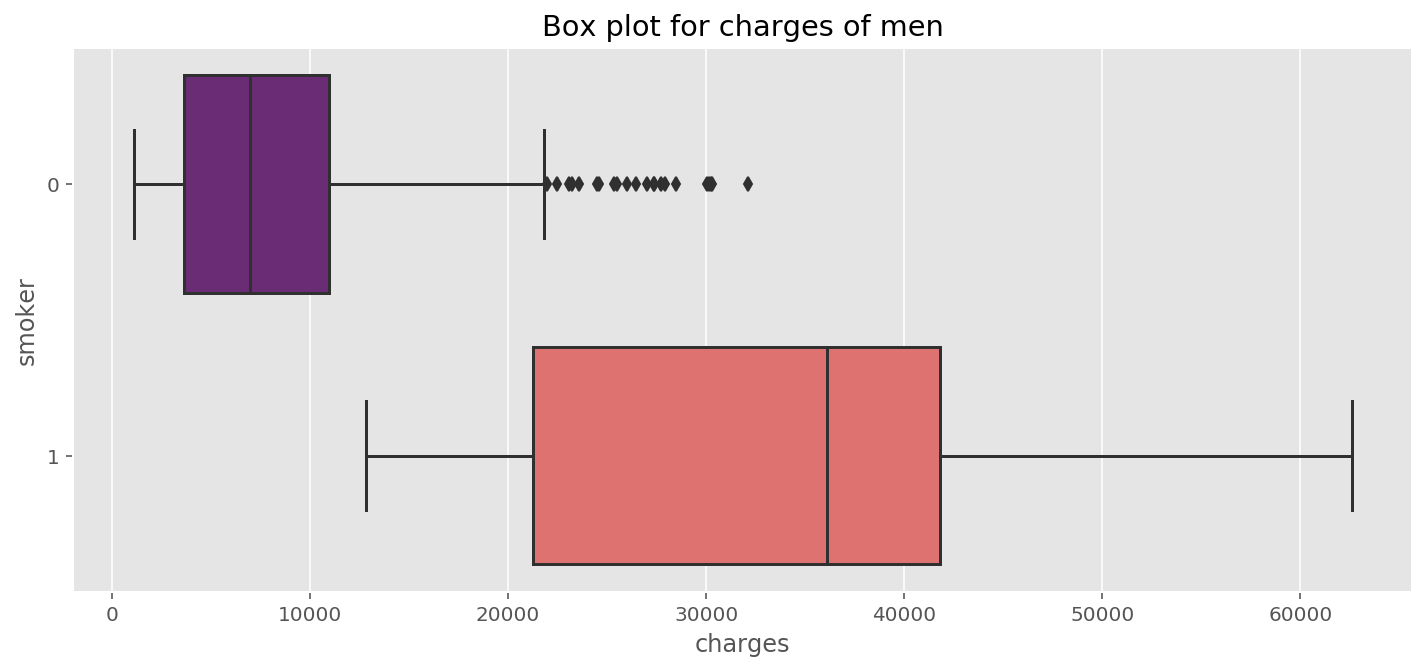

In [39]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df2[(df2.sex == 0)] , orient="h", palette = 'magma')

The male non-smoker will spend less charges than male smoker.

Whatever, the female and male, non-smoker often spend less money in medical.

# Is there a relationship between any of the attributes of the insurance models in our dataset? How strong? Do any of the attributes of the insurance seem to relate to its charges?
What is the effect of each car attribute on mpg?

In [69]:
# read the dataset 
df0 = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df0.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
df0.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

###  Visualize relationships among the features and the outcome

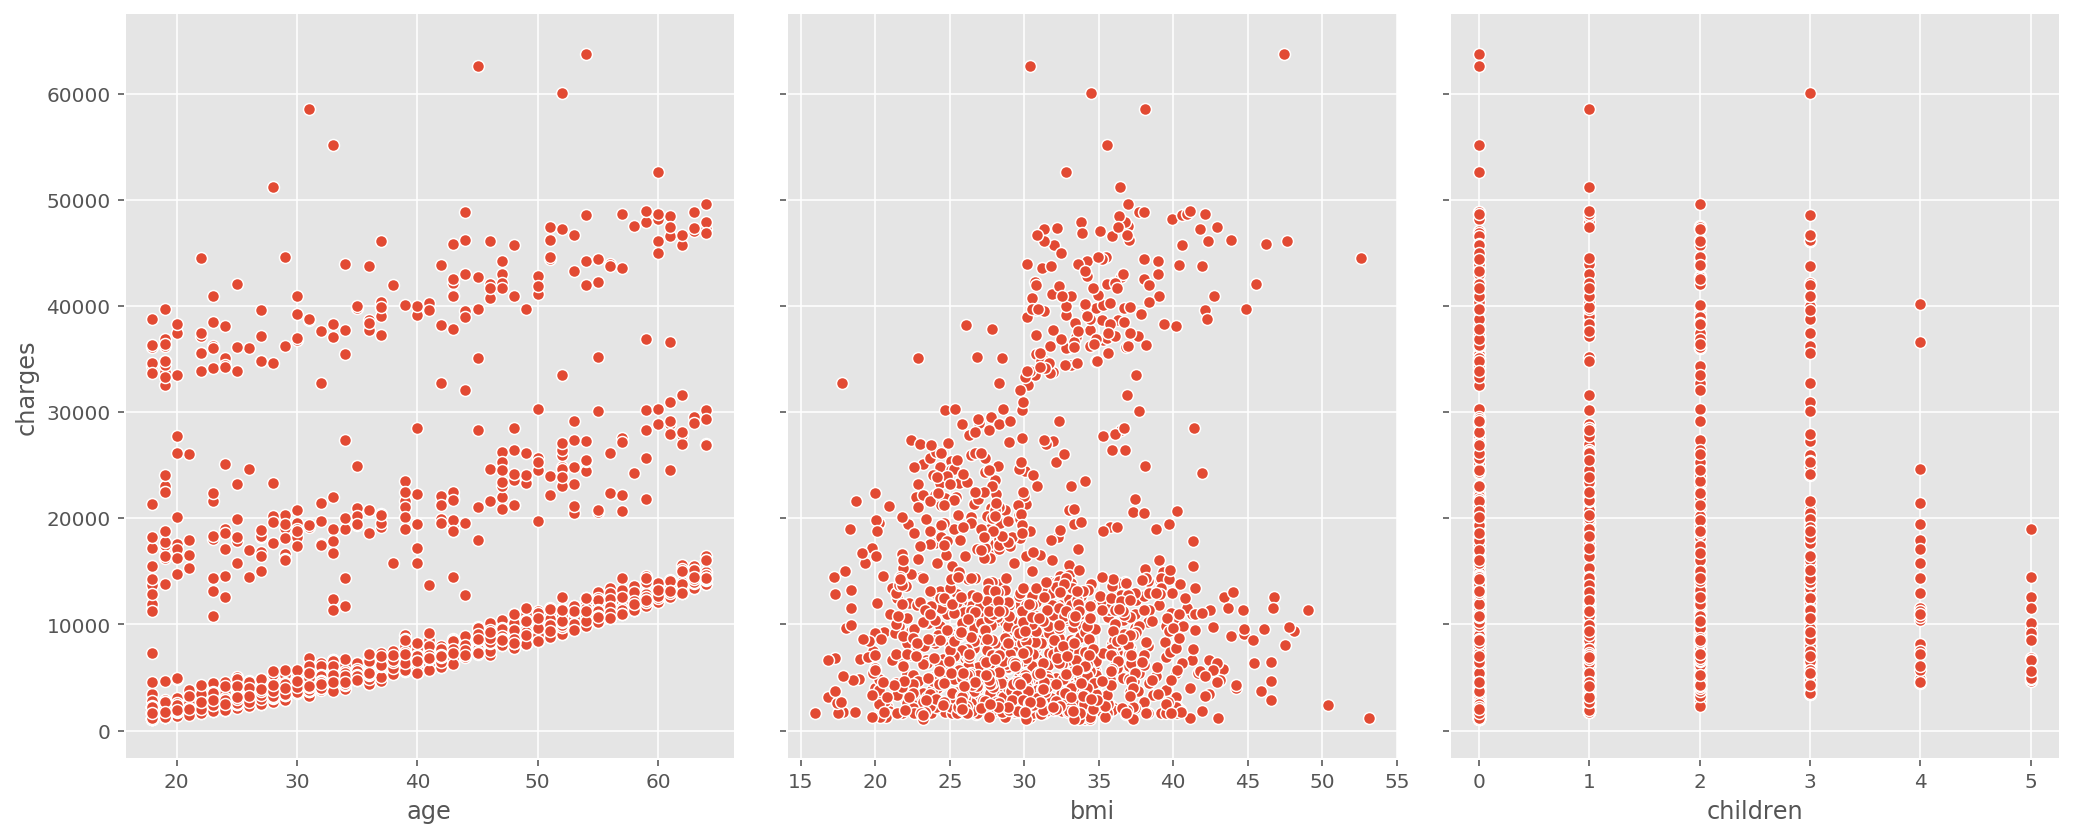

In [71]:
sns.pairplot(df0, x_vars=['age','bmi','children'], y_vars='charges', height=6, aspect=0.8);

Here we just tried to see if there was any relationship between age/bmi/children and charges for each feature by itself. Looks like age and bmi are positively correlated with charges. And the children is unclear yet.

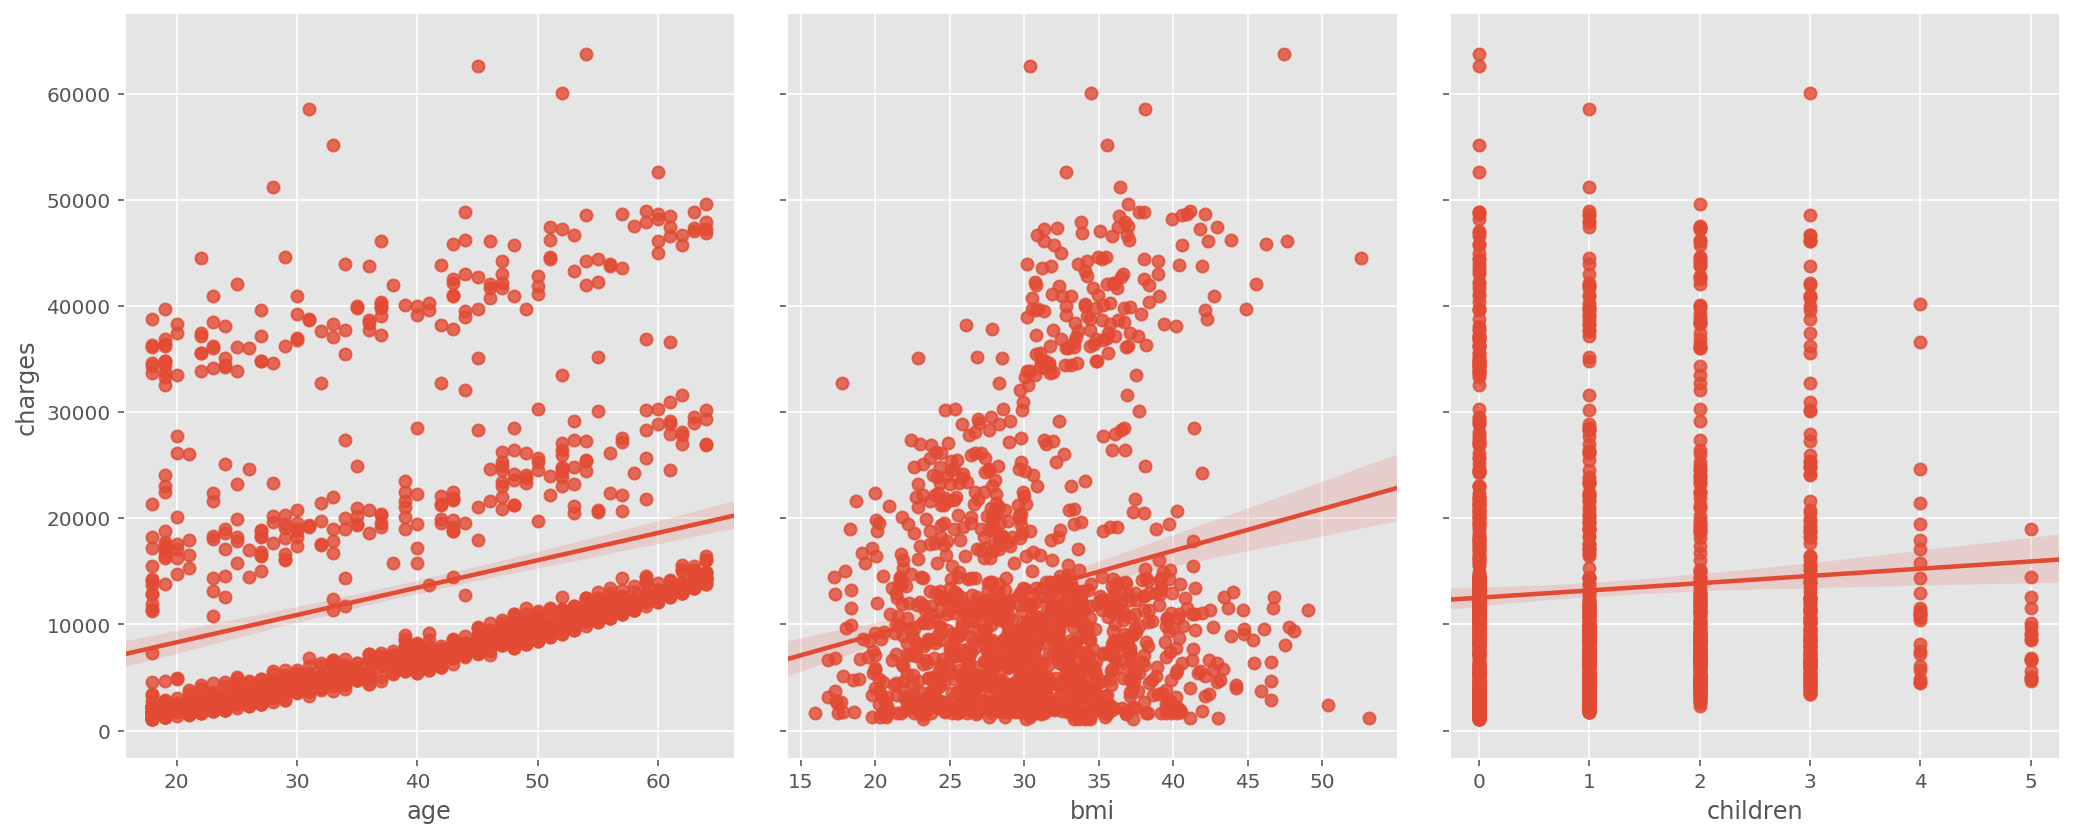

In [72]:
sns.pairplot(df, x_vars=['age','bmi','children'], y_vars='charges', height=6, aspect=0.8, kind='reg')

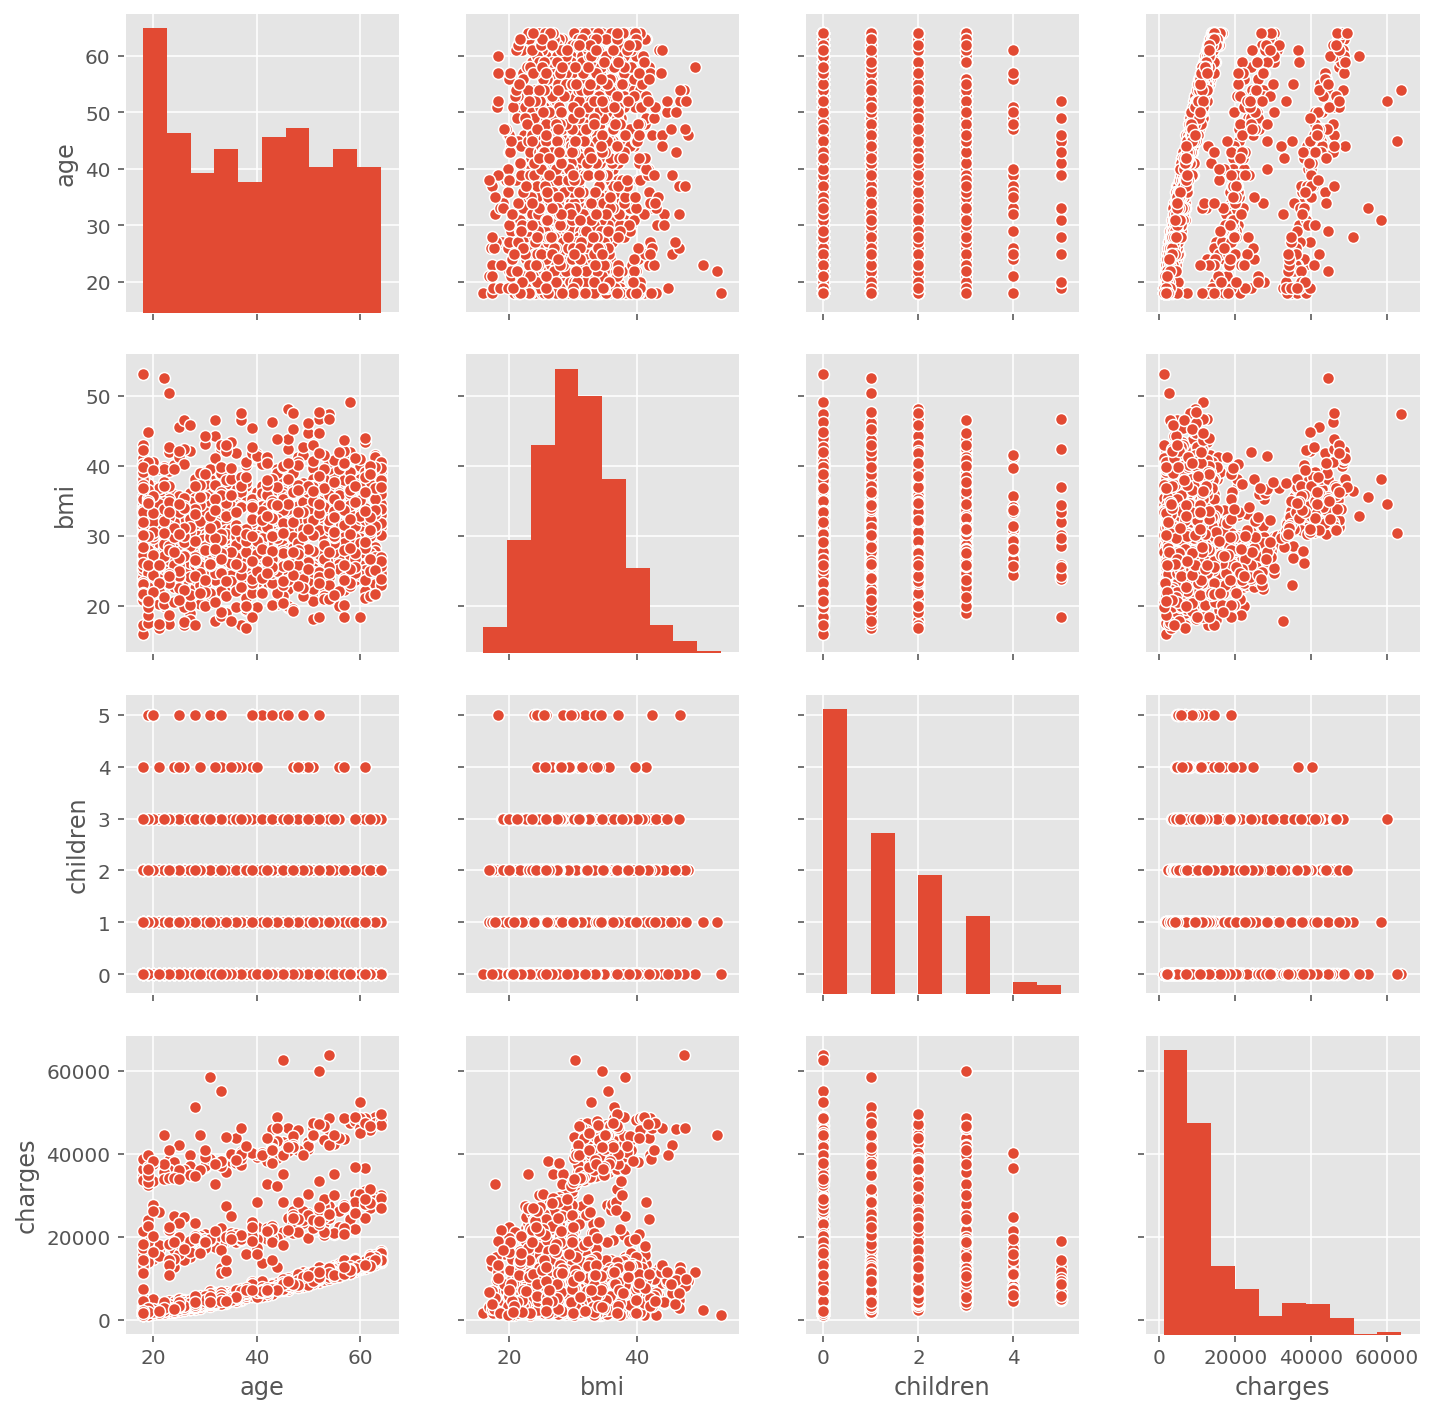

In [73]:
# use a correlation matrix to compute the pairwise correlations between all numeric variables.
sns.pairplot(df)

In [74]:
auto_correlations = df0.corr()
auto_correlations

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


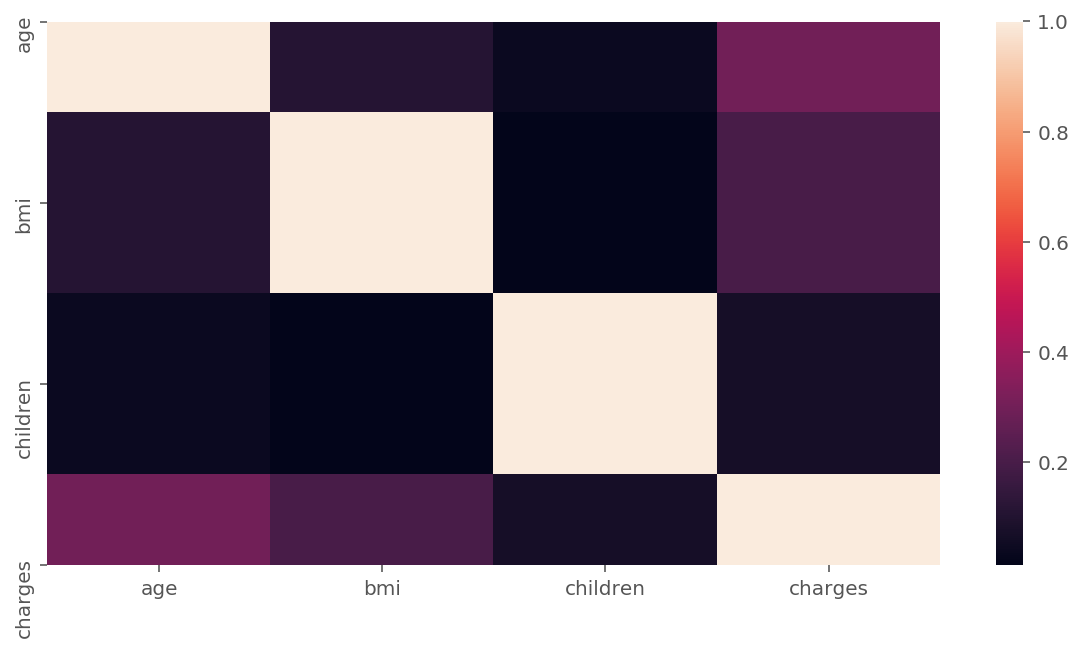

In [75]:
sns.heatmap(auto_correlations)

From the heatmap representation of the correlation matrix, we can quickly tell that age, bmi, children, charges  are are positively correlated and they are also correlated with both acceleration and charges.

##### the relationship between age and charges

In [76]:
df0.age.corr(df0.children)

0.04246899855884951

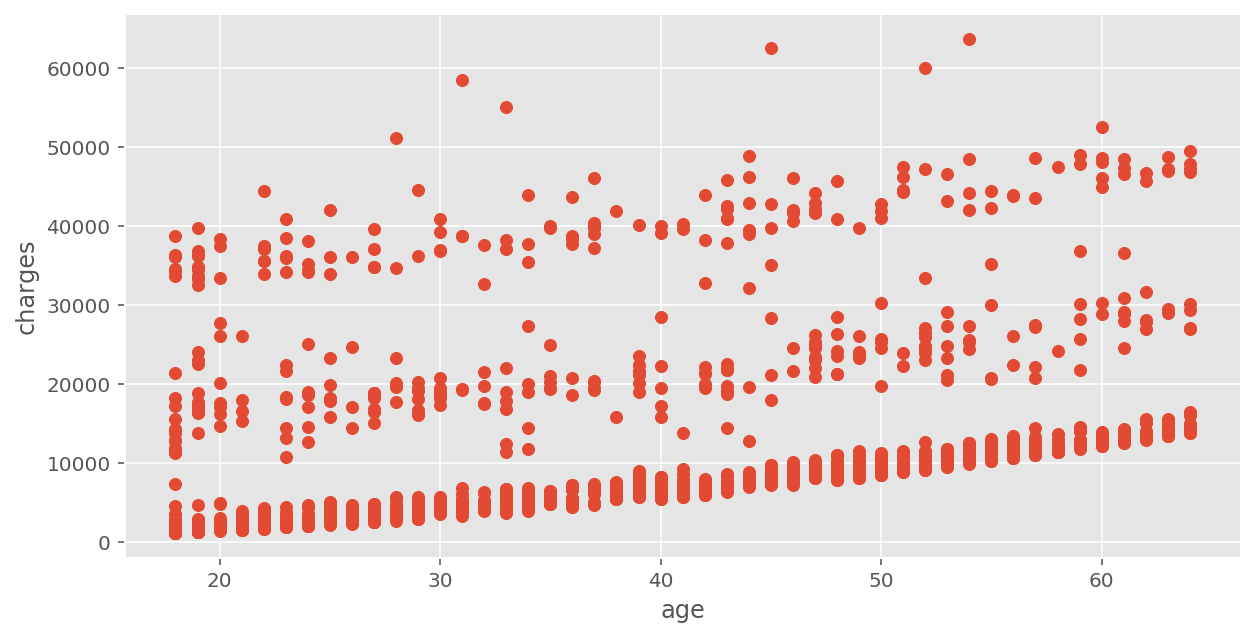

In [77]:
plt.scatter(df0.age, df0.charges)
plt.xlabel('age')
plt.ylabel('charges')
plt.show();

In [78]:
df0.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


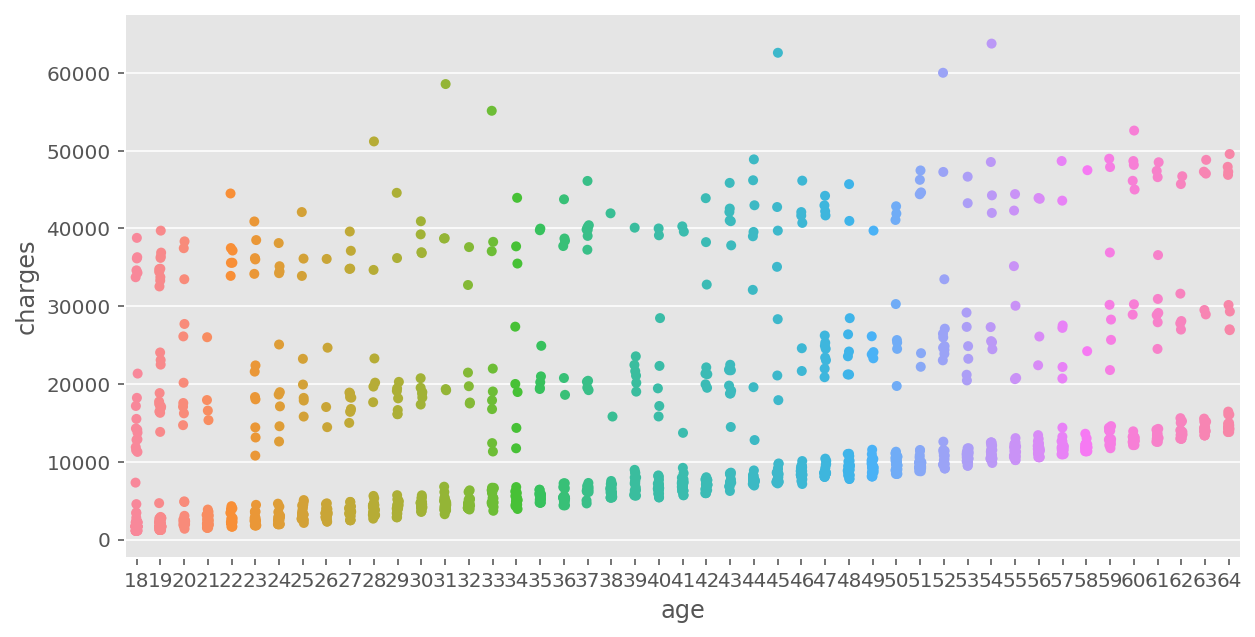

In [79]:
sns.stripplot(x="age", y="charges", data=df0, jitter=0.05)

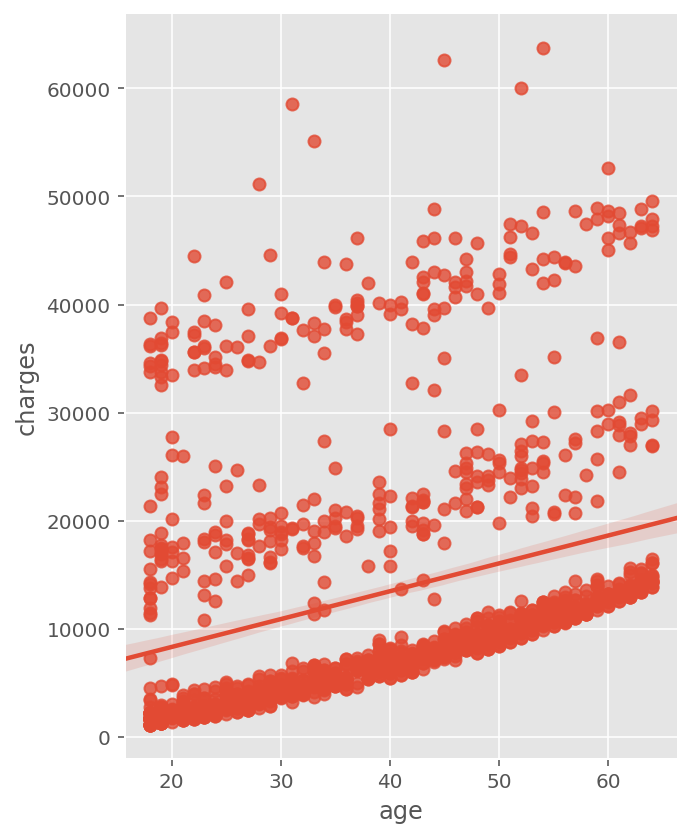

In [80]:
a=sns.pairplot(df0,x_vars=['age'],y_vars='charges',height=6, aspect=0.8,kind='reg')
a

In [86]:
# create X and y
feature_cols = ['age']
X = df0[feature_cols]
y = df0.charges

# instantiate and fit
acc_linreg = LinearRegression()
acc_linreg.fit(X, y)

# print the coefficients
print("The y intercept:", acc_linreg.intercept_)
print("The single coefficient:", acc_linreg.coef_)

The y intercept: 3165.8850060630157
The single coefficient: [257.72261867]


we can write the linear model is y=3165.8850060630157+257.72261867 ∗ age. Average beauty score is a statistically significant predictor but it may not be a practically significant predictor because when age average increase 1, the medical personal cost increase257.72261867.

R^2: 0.08940589967885797


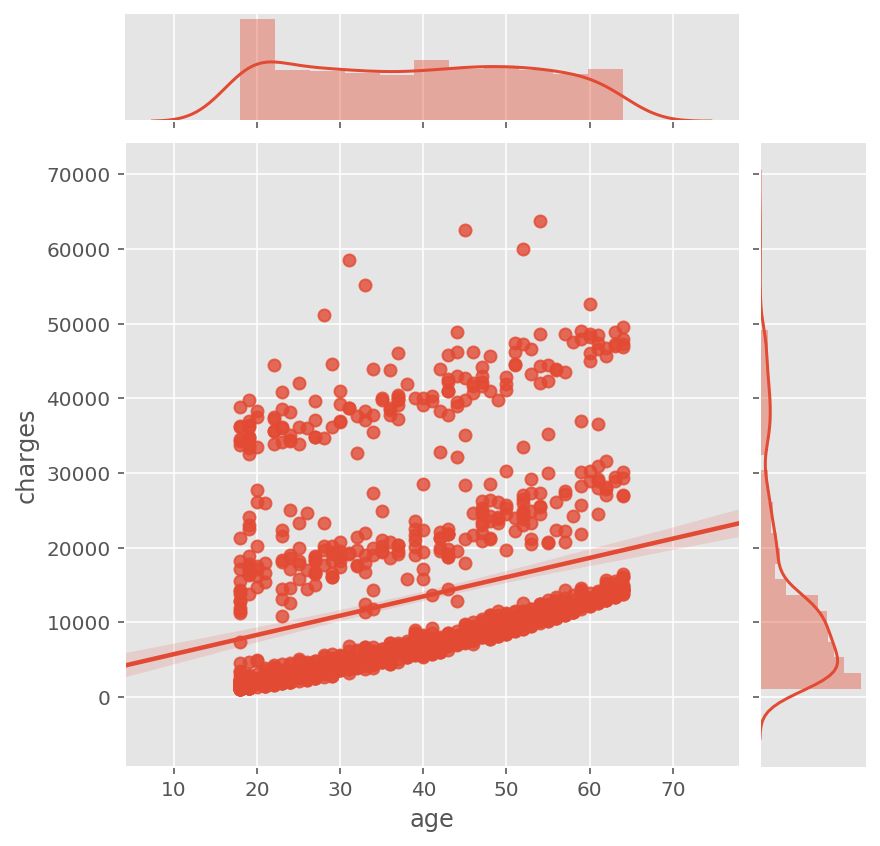

In [88]:
sns.jointplot('age', 'charges',df, kind="reg")
print("R^2:", stats.pearsonr(X.values.flatten(),y.values)[0]**2)

In [87]:
# confirm the R2
y_pred = acc_linreg.predict(X)
metrics.r2_score(y, y_pred)

0.08940589967885804

##### the relatioship between bmi and charges

In [232]:
df0.bmi.corr(df0.children)

0.012758900820673833

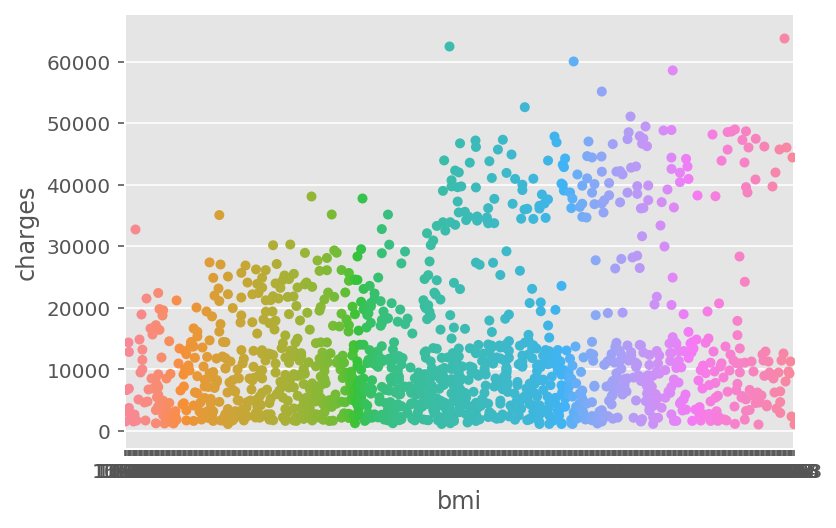

In [222]:
sns.stripplot(x="bmi", y="charges", data=df0, jitter=0.05)

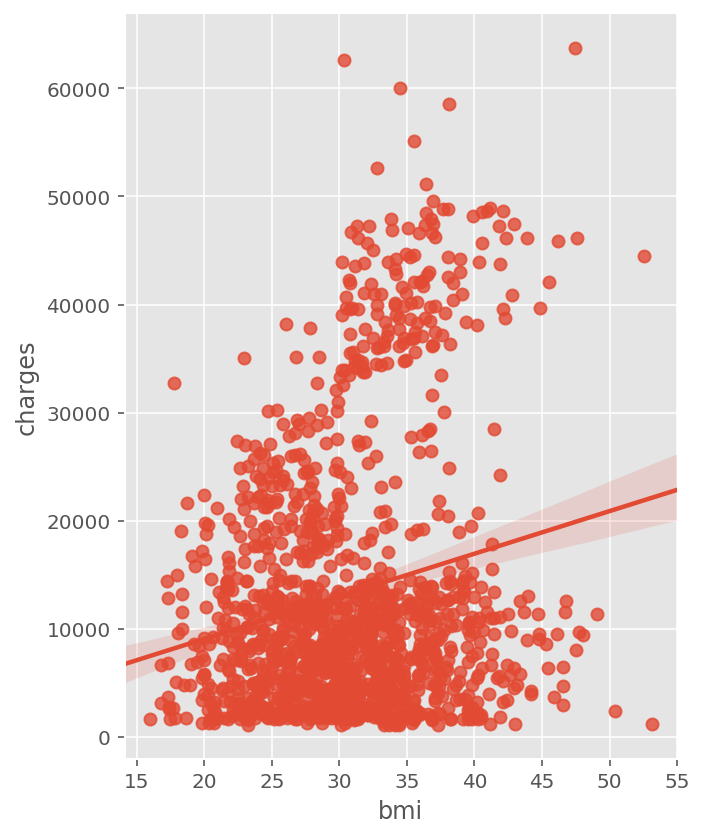

In [224]:
b=sns.pairplot(df0,x_vars=['bmi'],y_vars='charges',height=6, aspect=0.8,kind='reg')
b

In [95]:
# create X and y
feature_cols = ['bmi']
X = df0[feature_cols]
y = df0.charges

# instantiate and fit
acc_linreg = LinearRegression()
acc_linreg.fit(X, y)

# print the coefficients
print("The y intercept:", acc_linreg.intercept_)
print("The single coefficient:", acc_linreg.coef_)

The y intercept: 1192.9372089611516
The single coefficient: [393.8730308]


we can write the linear model is y=1192.9372089611516+393.8730308 ∗ bmi. bmi is a statistically significant predictor but it may not be a practically significant predictor because when bmi increase 1, the medical personal cost increase 393.8730308.

R^2: 0.039339139917862545


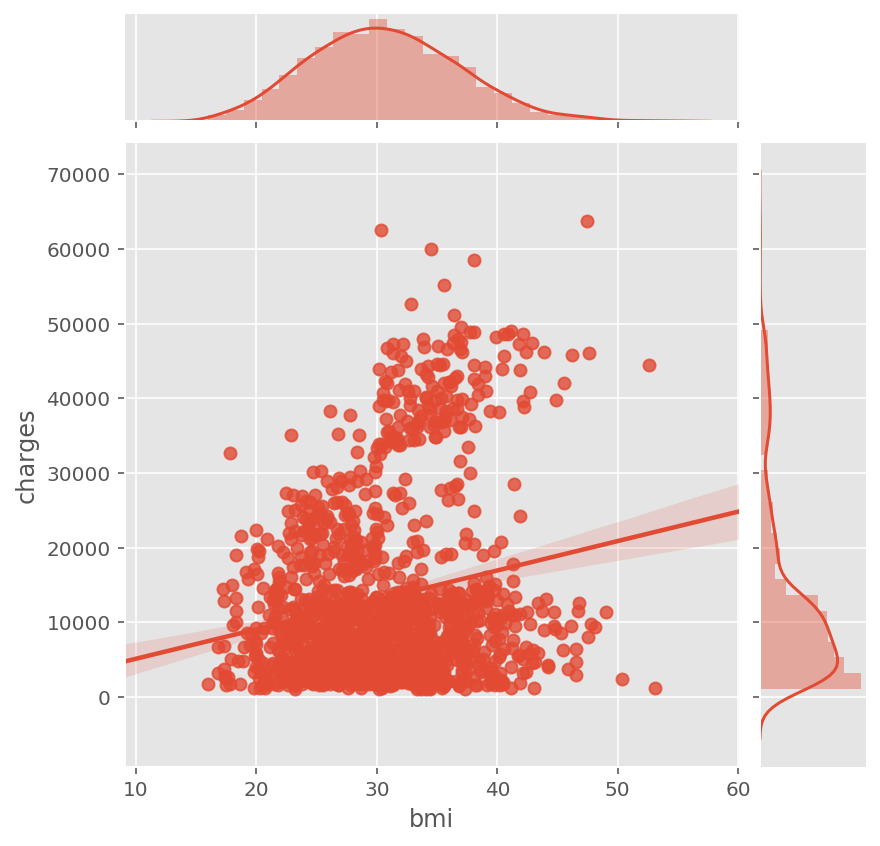

In [96]:
sns.jointplot('bmi', 'charges',df, kind="reg")
print("R^2:", stats.pearsonr(X.values.flatten(),y.values)[0]**2)

In [97]:
# confirm the R2
y_pred = acc_linreg.predict(X)
metrics.r2_score(y, y_pred)

0.03933913991786253

##### the association between childrens and charges

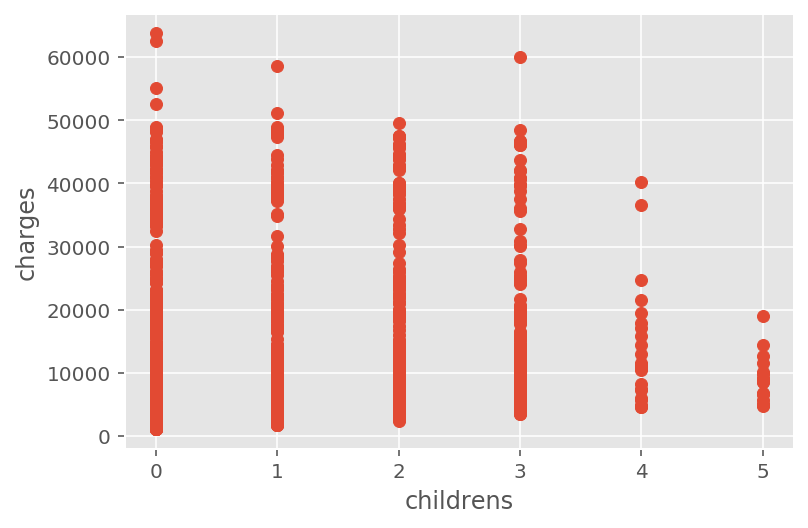

In [229]:
plt.scatter(df0.children, df0.charges)
plt.xlabel('childrens')
plt.ylabel('charges')
plt.show()

In [99]:
# create X and y
feature_cols = ['children']
X = df0[feature_cols]
y = df0.charges

# instantiate and fit
acc_linreg = LinearRegression()
acc_linreg.fit(X, y)

# print the coefficients
print("The y intercept:", acc_linreg.intercept_)
print("The single coefficient:", acc_linreg.coef_)

The y intercept: 12522.495549644098
The single coefficient: [683.08938248]


we can write the linear model is y=12522.495549644098+683.08938248 ∗ children. children is a statistically significant predictor but it may not be a practically significant predictor because when children average increase 1, the medical personal cost increase 683.08938248 .

R^2: 0.0046237588544591245


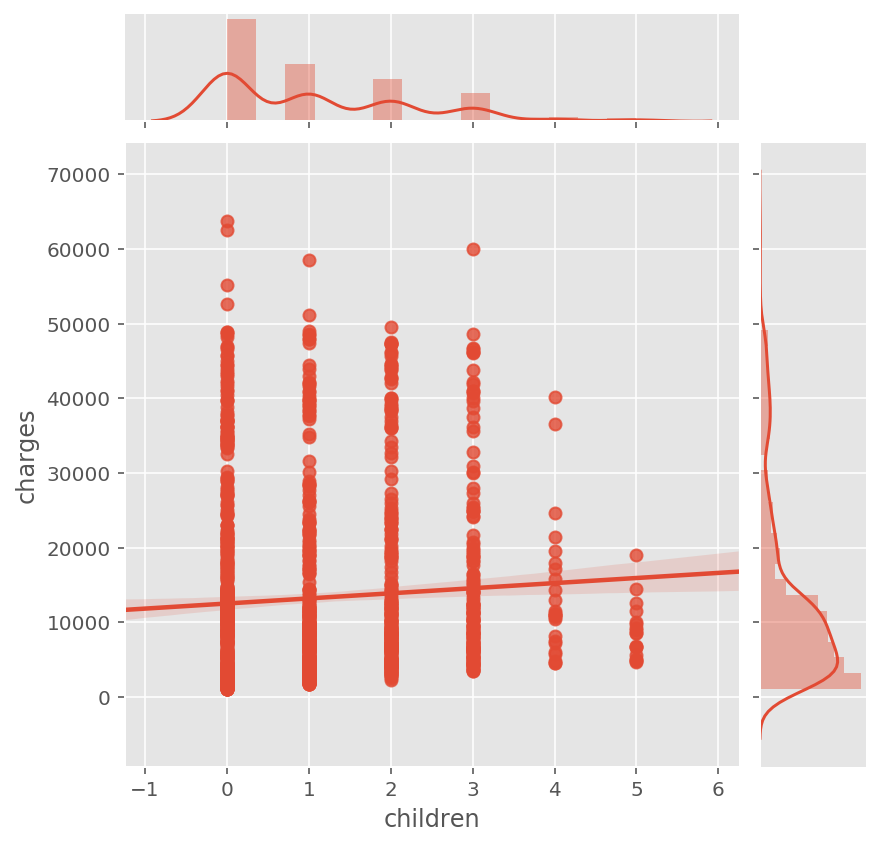

In [100]:
sns.jointplot('children', 'charges',df, kind="reg")
print("R^2:", stats.pearsonr(X.values.flatten(),y.values)[0]**2)

In [101]:
# confirm the R2
y_pred = acc_linreg.predict(X)
metrics.r2_score(y, y_pred)

0.004623758854459203

The R2 of the age and charges is the highest than bmi and children. Age has the strongest relationship with charges. And the number of the children has the weakest relationship with charges. WIth the increasing of the age, the charges also improve. It might means people spend more attention to take care themtheves not just wait for self-healing or have more ills or both. In addition, the bmi is higher, the more charges people have. It means that people need to control their weightif they do not want to spend more charges.The number of children has slightly positive relationship with charges.

Conclusion:
    1. There are no strong evidence prove that there are systematic differences in the beneficiary's residential area in the US between people with different smoke statuses
    2. There are systematic differences in the midical personal cost with different gender.
    3. The childrens has the strongest correlation with charges during age, bmi, and children variables.However, three variables do not have strong correlation with charges because of the low corr.
    4. According to the charts, we find that the Smoking patients spend more money on treatment.
    5. we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. 
    6. Age has the strongest relationship with charges. And the number of the children has the weakest relationship with charges. 


People should refuse to smoke. Smoking will make people spend more money in medical personal cost whatever female and male.